## 第七次练习

+ 请务必交到exer7文件夹下，**谢绝交到master下**
+ 请不要改动任何文件，拜托
+ 请在12月20日前提交。

请写一下姓名和学号：
+ 姓名  王文韬
+ 学号 0165224

下面的图都至少需要在图上标注：
+ 图标题
+ x轴标题
+ y轴标题
+ 适当修改x轴或者y轴的刻度及标签，使之清晰美观
+ 根据需要添加图例

In [1]:
def ZscoreNormalization(x):
    """Z-score normaliaztion"""
    x = float(x)
    x = (x - np.mean(x)) / np.std(x)
    return x

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [4]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

### 散点图
反映期中考试标准化成绩语文（stdchn）和期中考试标准化成绩数学（stdmat）的相关关系

D:\ProgramData\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


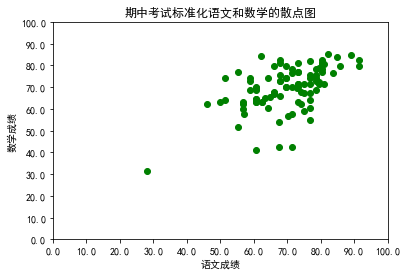

In [5]:
xminorLocator   = MultipleLocator(10) #将x主刻度标签设置为0.5的倍数
xminorFormatter = FormatStrFormatter('%1.1f') #设置x轴标签文本的格式

ymajorLocator   = MultipleLocator(10) #将y轴主刻度标签设置为0.5的倍数
ymajorFormatter = FormatStrFormatter('%1.1f') #设置y轴标签文本的格式

sentinels = {'stdchn': [' '], 'stdmat': [' ']}
df = pd.read_csv('CEPS.csv',encoding='gb2312', na_values=sentinels)
df = pd.DataFrame(df)
df=df.head(100)

fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.set_title("期中考试标准化语文和数学的散点图", fontdict=None, loc='center')
x=df.stdchn[:100]
y=df.stdmat[:100]
ax1.set_xlabel('语文成绩')
ax1.set_ylabel('数学成绩')
ax1.xaxis.set_major_locator(xminorLocator )
ax1.xaxis.set_major_formatter(xminorFormatter)

ax1.yaxis.set_major_locator(ymajorLocator)
ax1.yaxis.set_major_formatter(ymajorFormatter)
ax1.set_xlim(0,100)
ax1.set_ylim(0,100)

# 设置图表标题并给坐标轴加上标签

plt.scatter(x,y,color='g') 
# 设置刻度标记的大小

plt.show()

### 饼图
对问题“你是独生子女吗”(b01)的回答有“是”和“否”两种回答，相应的数字分别是1和2。请画一个饼图反映二者的比例。

D:\ProgramData\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


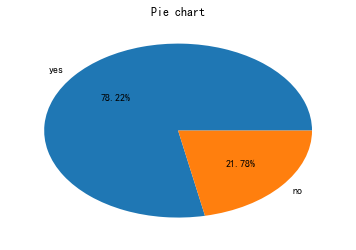

In [6]:
df = pd.read_csv('CEPS.csv',encoding='gb2312')
df = pd.DataFrame(df)
x1=df.b01[:101]
x=[]
for x2 in x1:
    x2=float(x2)
    x.append(x2)
x1=x.count(1)
x2=x.count(2)
labels=['yes','no']
X=[x1,x2]  
fig = plt.figure()
plt.pie(X,labels=labels,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
plt.title("Pie chart")
plt.show()

### 直方图
反映变量“每天晚上睡多长时间-小时”(b18a)的分布情况。

D:\ProgramData\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


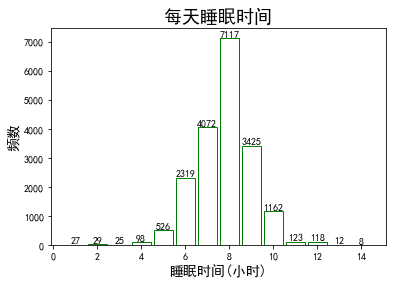

In [7]:
sentinels = {'b18a': [' ','0', '15','16','17','18','19', '20', '21', '22', '23', '24', '41']}#要剔除的数据，还有个熊孩子填了41
df = pd.read_csv('CEPS.csv',encoding='gb2312', na_values=sentinels)                          #选取睡眠时间在1-14小时的数据
df = pd.DataFrame(df)

Y = df['b18a'].value_counts().sort_index()#使用pandas的值计数函数按index升序输出（并将Series对象的值转化为列表）#Series也能用

X = [i for i in range(1,15)]
plt.bar(X,Y,width = 0.85,facecolor = 'white',edgecolor = 'green')#后3个元素添加绿色外壳

for x,y in zip(X,Y):#加数据标签，可要可不要
    plt.text(x, y, '%d' % y, ha='center', va= 'bottom')

plt.title("每天睡眠时间", fontsize=18)#外框三要素
plt.xlabel("睡眠时间(小时)", fontsize=14)     #plt.xlim(0,+15)#可要可不要
plt.ylabel("频数", fontsize=14)
plt.show()

### 柱图
反映变量"你妈妈是做什么工作的"(b08a)的职业分布情况，数字和编码关系如下：

+ 1	国家机关事业单位领导与工作人员
+ 2	企业/公司中高级管理人员
+ 3	教师、工程师、医生、律师
+ 4	技术工人（包括司机）
+ 5	生产与制造业一般职工
+ 6	商业与服务业一般职工
+ 7	个体户
+ 8	农民
+ 9 无业、失业、下岗


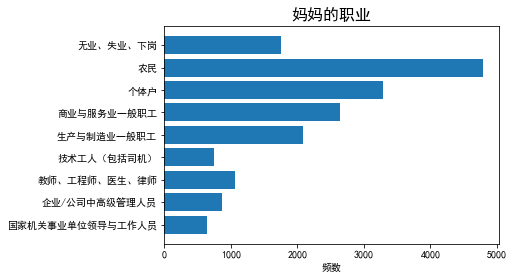

In [10]:
nums = []
for i in range(1, 10):
    nums.append(sum(df.b08a==str(i)))

names=['国家机关事业单位领导与工作人员','企业/公司中高级管理人员',
'教师、工程师、医生、律师','技术工人（包括司机）','生产与制造业一般职工',
'商业与服务业一般职工','个体户','农民','无业、失业、下岗']

plt.barh(range(len(nums)),nums,tick_label=names)
plt.title("妈妈的职业", fontsize=16)
plt.xlabel('频数')
plt.show()